# SyriaTel Customer Churn Project

## Introduction




This project analyzes the  [SyriaTel Churn dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) to predict whether a customer is likely to stop doing business with SyriaTel, a telecommunications company. The goal of this analysis is to help the business identify customers at high risk of churning and support data-driven decisions aimed at improving customer retention.


## Objectives 


The main objectives of this project are to:

1. Clean and prepare the customer data for classification modeling  
2. Build and evaluate classification models to predict customer churn  
3. Identify key factors associated with customer churn  
4. Provide actionable recommendations to reduce customer churn


## Business Understanding



Customer churn represents a significant financial challenge for telecommunications companies as losing customers directly impacts recurring revenue. SyriaTel’s management require data-driven insights to better understand which customers are most likely to leave the service.

This analysis focuses on identifying patterns in customer behavior, such as service usage, subscription plans, and customer service interactions, that are associated with higher churn risk. By predicting churn in advance, the business can target at-risk customers with retention strategies, such as improved support or personalized offers, to reduce overall customer loss.


## Data Understanding

In [1]:
# importing the necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay,classification_report,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



df = pd.read_csv("./Data/Customer_Churn.csv")
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
# overview of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### NOTE:
We have 4 non-numerical columns(`state`,`phone number`,`international plan`,`voice mail plan`) thus before modeling there is need to understand the contents of those columns and encode them appropriately

In [3]:
#Descriptive analysis
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
#Checking for null values
df.isna().sum() # No null values from the output


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [5]:
#Check for duplicates
df.duplicated().sum() #No duplicatesfrom the output

0

In [6]:
#Convert the columnsto snake case for readability
df.columns = df.columns.str.replace(' ', '_')
df.columns


Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

### Exploring some  possible feature columns

In [7]:
df['international_plan'].value_counts()

no     3010
yes     323
Name: international_plan, dtype: int64

In [8]:
df['customer_service_calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: customer_service_calls, dtype: int64

In [9]:
df['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OR     78
OH     78
WY     77
VA     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
WA     66
CO     66
NV     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
ME     62
ND     62
NM     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

### Exploring the Target Variable(Churn) Column

In [10]:
#Checking the churn column to see its content
df['churn'].value_counts(normalize=True) *100

False    85.508551
True     14.491449
Name: churn, dtype: float64

### NOTE:


The `churn` column has 85:15 split meaning it is imbalanced thus need to apply methods to handle this later in the process such as SMOTE and class weights.

### Handling the target column which is a categorical column to numerical column

In [11]:
## Handling the target column
df['churn'] = df['churn'].apply(lambda x: 1 if x== True else 0)


In [12]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

### Handling the feature columns that are categorical to numerical columns

In [13]:
#Checking the state column to undestand the number of states in that column since if i encode it having very many unique values can lead to risk of high dimensionality
len(df['state'].value_counts())

51

#### Dealing with the state column
The state column has 51 different states thus if i encode it this could lead to high dimensionality which would affect the model's performance.
I choose to drop that column to avoid risk of overfitting and use the `area code` column  to reference geographical location

In [14]:
#Columns to drop
# Phone numbers are respective to indivual and has little to no relation on churn rate
#Also dropping the state column as stated above 
cols_to_drop =['state','phone_number']
df = df.drop(cols_to_drop, axis=1)


In [15]:
#To confirm the columns were dropped
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
       'total_eve_charge', 'total_night_minutes', 'total_night_calls',
       'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

In [16]:
## Handling the rest of the categorical feature columns
categorical_cols = [ 'international_plan', 'voice_mail_plan']

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [17]:
# Confirming the categorical columns were encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   number_vmail_messages   3333 non-null   int64  
 3   total_day_minutes       3333 non-null   float64
 4   total_day_calls         3333 non-null   int64  
 5   total_day_charge        3333 non-null   float64
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_eve_charge        3333 non-null   float64
 9   total_night_minutes     3333 non-null   float64
 10  total_night_calls       3333 non-null   int64  
 11  total_night_charge      3333 non-null   float64
 12  total_intl_minutes      3333 non-null   float64
 13  total_intl_calls        3333 non-null   int64  
 14  total_intl_charge       3333 non-null   

In [18]:
df.columns

Index(['account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn', 'international_plan_yes',
       'voice_mail_plan_yes'],
      dtype='object')

## Modeling the dataset 

In [20]:
# features = ['total_day_charge', 'total_eve_charge', 'total_intl_charge', 'customer_service_calls', 'international_plan_yes','voice_mail_plan_yes']

X = df.drop('churn',axis= 1)
y= df['churn']

In [21]:
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [22]:
#Investigating need for scaling
X.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,international_plan_yes,voice_mail_plan_yes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.096910,0.276628
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.295879,0.447398
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000,1.000000


### Note:
From the above descriptive statistics , columns such as total_day_minutes and total_eve_minutes have ranges from 0-350 while total_intl_minutes 0-20 customer_service_calls 1-9 thus need for scaling the features

In [23]:
#Splitting the data into training and test splits
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state =42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (2666, 18)
Test shape: (667, 18)


### Solving the target imbalance issue with SMOTE

In [24]:
y_train.value_counts(normalize=True) *100 # We have 85:15 churn rate thus imbalance 


0    85.671418
1    14.328582
Name: churn, dtype: float64

In [25]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Only apply to training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class balance
print(y_train_resampled.value_counts())


1    2284
0    2284
Name: churn, dtype: int64


### Scaling the features before fitting our model

In [26]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both training and test
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)



### Fitting the baseline model-Logistic Regression

In [27]:

# Initialize logistic regression
LogR = LogisticRegression()

# Fitting the model
LogR.fit(X_train_scaled, y_train_resampled)

# Predicting
y_pred = LogR.predict(X_test_scaled)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))




Confusion Matrix:
 [[414 152]
 [ 29  72]]


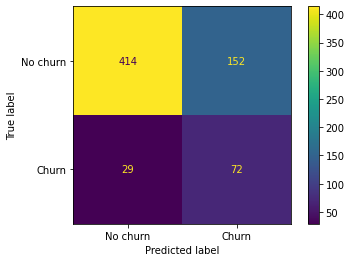

In [28]:
#Visualizing the confusion matrix
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['No churn','Churn'])
display.plot()
# plt.show()


### Classification metrics

In [29]:
#The overral classification metrics
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82       566
           1       0.32      0.71      0.44       101

    accuracy                           0.73       667
   macro avg       0.63      0.72      0.63       667
weighted avg       0.84      0.73      0.76       667



### Interpretation of the classification metrics

Customer churn represents lost revenue. The cost of failing to identify a customer who is about to leave (false negative) is typically higher than incorrectly flagging a loyal customer as at risk (false positive).

Therefore, `recall for the churn class was prioritized`. The model achieves a recall of 0.77,meaning it correctly identifies 77% of customers who are likely to leave

A limitation of the model is that precision for churn is relatively low, meaning some customers may be unnecessarily targeted with retention efforts.

### Tuning the baseline model

In [30]:
#Tuning the model

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='recall',   
    cv=5
)

grid.fit(X_train_scaled, y_train_resampled)

best_model = grid.best_estimator_


y_pred = best_model.predict(X_test_scaled)


print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.93      0.73      0.82       566
           1       0.32      0.71      0.44       101

    accuracy                           0.73       667
   macro avg       0.63      0.72      0.63       667
weighted avg       0.84      0.73      0.76       667



### Intrepration of the tuned model

The tuned logistic regression achieved a test recall of 0.77 which is same as baseline model. This suggests that hyperparameter adjustments had minimal impact on recall, indicating that the model is relatively stable.

### Fitting the second model-RandomForest

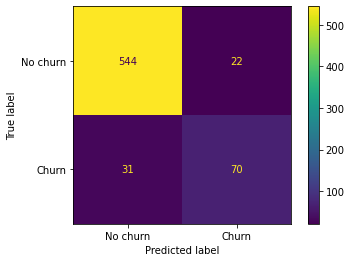

In [31]:
#Instantiate the randomforest model
model= RandomForestClassifier(n_estimators=100, random_state =42)

#Fitting the model
model.fit(X_train_resampled, y_train_resampled)

#prediction
y_randompred =model.predict(X_test)

#Confusion matrix and the report
cm = confusion_matrix(y_test,y_randompred)

display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['No churn','Churn'])
display.plot()


### Evaluating performance of the random forest model

In [32]:
print(classification_report(y_test,y_randompred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       566
           1       0.76      0.69      0.73       101

    accuracy                           0.92       667
   macro avg       0.85      0.83      0.84       667
weighted avg       0.92      0.92      0.92       667



### Intepretation of the result of the RandomForest Model


The Random Forest model achieves a` recall of 0.69,` meaning it correctly identifies 69% of customers who are likely to leave  lower than the logistic regression model which had 0.77.

However this model has better precision of0.64 than the logistic model meaning meaning less customers are falsely classified as churning comparied to the logistic model.

### Fitting the third model-Decision Tree 

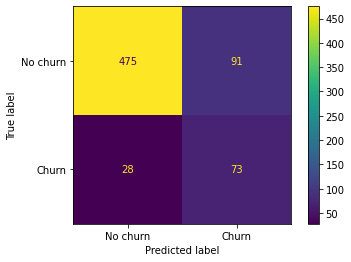

In [33]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree

# Training the classifier
classifier = DecisionTreeClassifier(random_state=10)  
classifier.fit(X_train_scaled, y_train_resampled) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       random_state=10, splitter='best')
# Make predictions for test data
y_pred = classifier.predict(X_test_scaled)  



# confusion matrix
cm = confusion_matrix(y_test,y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=['No churn','Churn'])
display.plot()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       566
           1       0.45      0.72      0.55       101

    accuracy                           0.82       667
   macro avg       0.69      0.78      0.72       667
weighted avg       0.87      0.82      0.84       667



### Intrepration of the performance of the decision tree


The Decison Tree model achieves a` recall of 0.72,` meaning it correctly identifies 72% of customers who are likely to leave .This is higher recall than random forest but lower than logistic.

The precision is also lower than random forest model.

## Modelling conclusion

To determine the best-performing model, I will use the F1 score, as it provides a balanced measure of precision and recall, which is especially important given that the dataset was originally imbalanced. In churn prediction, recall ensures that most customers who are likely to leave are correctly identified, while precision ensures that the model does not wrongly label too many loyal customers as churners. Balancing both is important so the company can target the right customers without wasting retention resources.


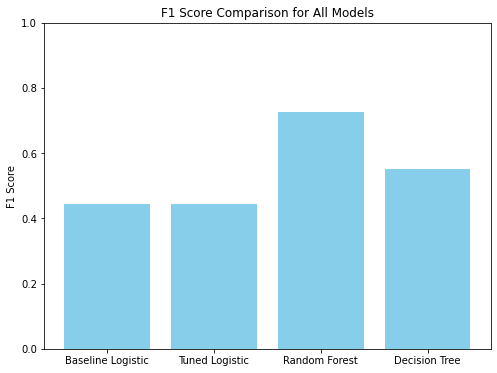

In [35]:


# Compute F1 for each model (assuming threshold=0.5)
f1_scores = {
    "Baseline Logistic": f1_score(y_test, LogR.predict(X_test_scaled)),
    "Tuned Logistic": f1_score(y_test, best_model.predict(X_test_scaled)),
    "Random Forest": f1_score(y_test, model.predict(X_test)),
    "Decision Tree": f1_score(y_test, classifier.predict(X_test_scaled))
}

# Plot
plt.figure(figsize=(8,6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison for All Models")
plt.ylim(0,1)
plt.show()


### Interpretation of the f1 score bar chart

Looking at the bar chart, the Random Forest model has the highest F1 score compared to the other models. This means it achieves the best balance between precision and recall when predicting customer churn.This suggests it is better at balancing correctly identifying customers who churn while avoiding too many false alarms. The Decision Tree also performs reasonably well, but the logistic regression models lag behind. Therefore, Random Forest would be the preferred model based on F1 score.

### Feature importance

Since the Random Forest model was best performing in terms of F1-score,I will do feature importance to determine the heaviest contributors to churning rate 

In [36]:
# Getting the feature importance
feature_importances = model.feature_importances_

# Creating a DataFrame to visualize
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                   Feature  Importance
5         total_day_charge    0.123739
3        total_day_minutes    0.112871
15  customer_service_calls    0.103709
6        total_eve_minutes    0.062589
8         total_eve_charge    0.060172
2    number_vmail_messages    0.054838
17     voice_mail_plan_yes    0.052151
1                area_code    0.047057
9      total_night_minutes    0.045558
13        total_intl_calls    0.045203
11      total_night_charge    0.043273
12      total_intl_minutes    0.043119
14       total_intl_charge    0.041048
0           account_length    0.038912
10       total_night_calls    0.035205
4          total_day_calls    0.035112
7          total_eve_calls    0.034849
16  international_plan_yes    0.020594


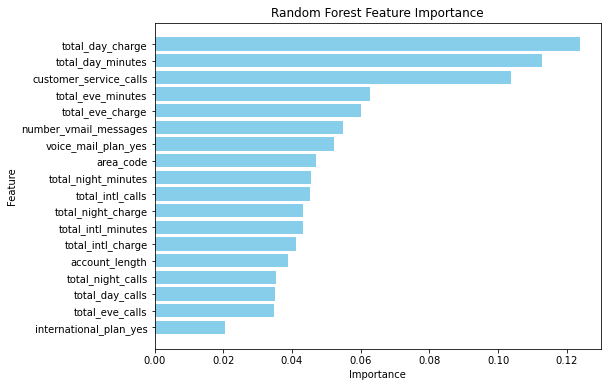

In [37]:
import matplotlib.pyplot as plt

# Sort the DataFrame (already sorted, but just to be safe)
importance_df = importance_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


### Interpretation


Looking at the the bar chart, the features that most influence whether a customer churns are `total day charge`,`total day minutes` `total eve charge`, and `customer service calls ` This means that customers’ spending patterns and their interactions with customer support play a major role in determining whether they stay or leave. In particular, higher day and evening charges may reflect higher bills, which could increase dissatisfaction and the likelihood of churn. Additionally, a higher number of customer service calls may indicate unresolved issues or complaints, which can further push customers to switch providers. Overall, the model suggests that billing-related factors and service experience are stronger drivers of churn than plan subscription features like voicemail or international plans.

### Conclusion

After evaluating the three models, the **Random Forest model** performed best based on the F1 score, indicating it achieved the strongest balance between precision and recall in predicting customer churn. Since missing a customer who is likely to churn is more costly than mistakenly flagging a loyal one, recall is particularly important in this context. However, relying on recall alone could lead to too many false alarms, so the F1 score is used to maintain a practical balance and ensure operational efficiency.


The feature importance analysis from the Random Forest model shows that the strongest predictors of churn are:

- Total Day Charge 
- Total Day minutes 
- Total Evening Charge  
- Customer Service Calls  


This suggests that customers’ spending patterns and their interactions with customer support are key drivers of churn. In particular, higher call charges and frequent customer service calls may reflect dissatisfaction, billing concerns, or unresolved issues, increasing the likelihood that a customer will leave.

## Recommendations

Based on these findings, the following recommendations are proposed:

1. **Improve Customer Support Experience:**  
   Since frequent customer service calls are strongly associated with churn, SyraTel should prioritize faster resolution times, proactive follow-ups, and improved service quality to reduce customer frustration.

2. **Monitor High-Spending Customers:**  
   Customers with high day and evening call charges may be more price-sensitive or dissatisfied with billing. Offering personalized plans, loyalty discounts, or bundled packages could help retain these customers.

3. **Review International Pricing Strategies:**  
   As international charges also contribute to churn, SyraTel could reassess pricing structures or introduce competitive international bundles to reduce dissatisfaction.

4. **Implement Early Churn Detection:**  
   The Random Forest model can be deployed to identify high-risk customers early, allowing the company to intervene with targeted retention strategies.

5. **Continuous Monitoring and Model Updates:**  
Ongoing analysis of customer behavior and periodic model retraining will help ensure the predictions remain accurate over time.
